### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [4]:
import pandas as pd

In [5]:
df_PR = pd.read_csv('online_retail_II.csv')
df_PR

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## Section 1

### Create New Feature: Year

In [6]:
df_PR.shape

(1067371, 8)

In [7]:
df_PR.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [8]:
df_PR["InvoiceDate"] = df_PR["InvoiceDate"].astype('datetime64[ns]')
#Ubah tipe data

In [9]:
df_PR.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [10]:
df_PR['InvoiceYear'] = pd.DatetimeIndex(df_PR['InvoiceDate']).year

In [11]:
df_PR.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


### Filtering Data

In [12]:
fil_qty = df_PR[df_PR['Quantity'] > 1 ]
fil_qty
#Filter Quantity dari data yang mentah

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011


In [13]:
Invoice_F = fil_qty['Invoice'].str.contains('C', case=False, na=False)
fil_Inv = fil_qty[~Invoice_F]
# FIlter Invoice dari variabel yang sudah di filter Quantity

In [14]:
fil_Inv

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011


### Create New Feature: Revenue

In [15]:
#Revenue = hasil price x transaksi dari data yang sudah di filter Qty dan INV 
fil_Inv['Revenue'] = fil_Inv['Quantity']*fil_Inv['Price']
fil_Inv

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,10.20
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60


### Average of Revenue per Year

In [16]:
#fil_Inv adalah data yang sudah difilter dan sudah ditambah Revenue
#Jumlah Pendapatan setiap Tahun
rev_year = fil_Inv.groupby('InvoiceYear')['Revenue'].sum().reset_index()
rev_year

,InvoiceYear,Revenue
0,2009,728068.61
1,2010,9159557.69
2,2011,8950991.05


In [17]:
#Rata-Rata Total Invoice Tiap Tahun
fil_Inv.groupby('InvoiceYear')['Revenue'].mean().reset_index()

,InvoiceYear,Revenue
0,2009,25.023839
1,2010,25.106028
2,2011,25.132997


In [18]:
#Rata-Rata Revenue per Tahun

#Hitung Jumlah Tahun
j_years = len(list(set(fil_Inv['InvoiceYear'])))

#Hitung Total Revenue
tot_Revenue = rev_year['Revenue'].sum()

#Hitung Rata-Rata Revenue Per Tahun
RevenueY_M = tot_Revenue/j_years

"Average of Revenue per Year is "+str(RevenueY_M)

'Average of Revenue per Year is 6279539.116666667'

In [19]:
import matplotlib.pyplot as plt 

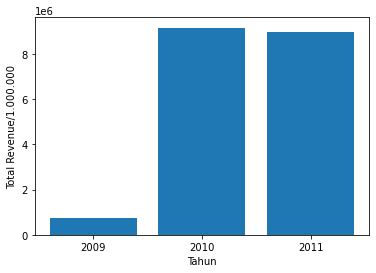

In [20]:
plt.bar(rev_year['InvoiceYear'],rev_year['Revenue'])
plt.xticks(rev_year['InvoiceYear'])
plt.ylabel('Total Revenue/1.000.000')
plt.xlabel('Tahun')
plt.show()

Text(0.5, 0, 'Tahun')

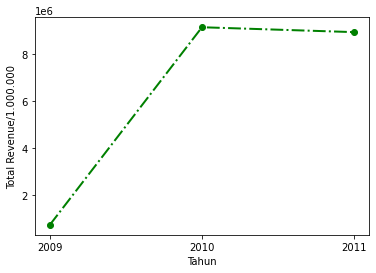

In [21]:
fil_Inv.groupby('InvoiceYear')['Revenue'].sum().plot(color='green', marker='o',linestyle='-.',linewidth=2)
plt.xticks(rev_year['InvoiceYear'])
plt.ylabel('Total Revenue/1.000.000')
plt.xlabel('Tahun')

### Interpretation

output no 4 
1. dihitung menggunakan data yang telah difilter Quantity dan Invoice Batal sebelumnya, karena Revenue Merupakan pendapatan.
2. Langkah pertama, cari total pendapatan per tahun, lalu cari jumlah tahun dan cari total pendapatan.
3. Rumus Rata-rata Pendapatan per tahun adalah total pendapatan / jumlah tahun.


## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [22]:
finished = fil_Inv[fil_Inv['Customer ID'].notnull()] 
finished

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,10.20
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60


#### Customers who canceled their purchases

In [23]:
fil = df_PR['Invoice'].str.contains('C', case=False, na=False)
cancel = df_PR[fil]
cancel
# FIlter Invoice dari variabel data mentah.

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011


### Number of Finished and Canceled Transactions Each Year

In [24]:
#Hitung Jumlah Transaksi Selesai
#j_finish = len(list(set(finished['Invoice'])))

# Hitung Transaksi per Tahun (1 Invoice = 1 Transaksi)
finished_y = finished.groupby(by='InvoiceYear',as_index=False).agg({'Invoice': pd.Series.nunique})
finished_y

,InvoiceYear,Invoice
0,2009,1471
1,2010,17912
2,2011,16877


In [25]:
#Hitung Jumlah Transaksi Selesai
j_finish = len(list(set(finished['Invoice'])))
j_finish

36260

In [26]:
#Hitung Jumlah Transaksi Dibatalkan
#j_cancel = len(list(set(cancel['Invoice'])))

# Hitung Transaksi per Tahun (1 Invoice = 1 Transaksi)
cancel_y = cancel.groupby(by='InvoiceYear',as_index=False).agg({'Invoice': pd.Series.nunique})
cancel_y

,InvoiceYear,Invoice
0,2009,401
1,2010,4381
2,2011,3510


In [27]:
#Hitung Jumlah Transaksi Dibatalkan
j_cancel = len(list(set(cancel['Invoice'])))
j_cancel

8292

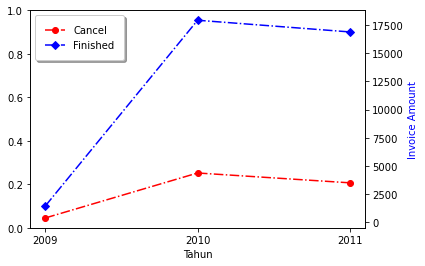

In [28]:
x = (cancel_y['InvoiceYear']) | (finished_y['InvoiceYear'])
y1 = cancel_y['Invoice']
y2 = finished_y['Invoice']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax2.plot(x, y1, color='red', marker='o', linestyle='-.', label="Cancel")
ax2.plot(x, y2, color='blue', marker='D', linestyle='-.', label="Finished")

ax1.set_xlabel('Tahun')
ax1.set_xticks(x)
ax2.set_ylabel('Invoice Amount', color="b")
ax2.legend(loc='upper left', shadow=True,borderpad=1)
plt.show()

### Cancellation Rate

In [29]:
# Hitung Transaksi per Tahun (1 Invoice = 1 Transaksi)
df_PR_tot_tr = df_PR.groupby(by='InvoiceYear',as_index=False).agg({'Invoice': pd.Series.nunique})

#Transaksi Cancel
cancel_y

#Buat Variabel untuk menampung Tabel Presentase
Cancellation_rate = pd.merge(cancel_y,df_PR_tot_tr, on=["InvoiceYear","InvoiceYear"])

#Hitung Presentase
Cancellation_rate['Rate'] = cancel_y['Invoice'] / df_PR_tot_tr['Invoice']*100
Cancellation_rate
#Jumlah customer cancel / jumlah customer x 100%

,InvoiceYear,Invoice_x,Invoice_y,Rate
0,2009,401,2330,17.210300
1,2010,4381,27423,15.975641
2,2011,3510,23875,14.701571


### Interpretation

1. dari no 3 dapat diketahui bahwa jumlah transaksi tidaksama dengan jumlah invoice, yang benar adalah satu Invoice = satu Transaksi, data Invoice berulang terhitung 1 transaksi.
2. Dari Hasil Output no 4 dapat diketahui presentase transaksi yang dibatalkan pelanggan dari seluruh jumlah data transaksi yang terekam(data mentah).
3. dari hasil output 3 dan 4 dapat diketahui jumlah transaksi dibatalkan dibawah jumlah tansaksi berhasil yaitu dibawah 20% dari transaksi berhasil.
4. dari hasil output 3 dan 4 dapat diketahui jumlah transaksi di tahun 2009 adalah paling kecil namun memiliki presentase pembatalan yang paling tinggi di 17,2%.
5. dari hasil output 3 dan 4 dapat diketahui jumlah transaksi berhasil dan dibatalkan meningkat di tahun 2010, juga diikuti penurunan presentase pembatalan menjadi 15,9%.
6. dari hasil output 3 dan 4 dapat diketahui presentase pembatalan terkecil ada di tahun 2011, namun terjadi juga terjadi penurunan jumlah transaksi berhasil.
7. dari hasil output 3 dan 4 dapat diketahui peningkatan jumlah transaksi peningkatan dan penurunan jumlah transaksi memiliki relasi dengan tingkat presentase transaksi yang dibatalkan. 